# Project: I’m Something of a Painter Myself


This project uses generative adversarial networks (GANs) to replicate the unique styles of famous artists like Claude Monet, either in photos or from scratch. While GANs are good at mimicking objects, creating art that resembles real masterpieces still requires both art and science. The goal is to see if GANs can trick classifiers into believing the generated art is an authentic Monet.

## Challenge:
A GAN includes at least two neural networks: a generator model and a discriminator model. The generator creates the images, and for this [competition](https://www.kaggle.com/competitions/gan-getting-started), it should produce images in Monet's style. The discriminator trains the generator by attempting to distinguish between real and generated images. The two models work against each other, with the generator trying to fool the discriminator and the discriminator striving to correctly identify real versus generated images. The task is to build a GAN that generates 7,000 to 10,000 Monet-style images.

## Table of Contents

- [Dataset](#dataset)
  - [Import Data from Kaggle](#import-data-from-kaggle)
- [Data Preparation and Exploration](#data-Preparation-and-exploration)  
  - [Import Libraries](#import-libraries)
  - [Exploring the data](#exploring-the-data)
    - [Number of Images](#number-of-Images)
    - [Visualizing a sample of images](#visualizing-a-sample-of-images)
    - [Numbers and sample file names of TFRecord files](#numbers-and-sample-file-names-of-TFRecord-files)
- [Data Processing and Augmentation](#data-processing-and-augmentation)   
   - [Decode and normalization function](#decode-and-normalization-function)
   - [Image Augmentations](#image-augmentations)
   - [Data Loading](#data-loading)
- [Model Construction and Architecture](#model-construction-and-architecture)
  - [Build Generators](#build-generators)
     - [Downsample](#downsample)
     - [Upsample](#upsample)
     - [Generator](#generator)
     - [Discriminator](#discriminator)
- [Build CycleGAN Model](#build-cycleGAN-model)  
  - [Define Loss Functions](#define-loss-functions)   

- [Tunning parameters](#tunning-parameters)  
- [Conclusion](#conclusion)     
- [References](#references)

# Import the dataset from Kaggle.

In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
#! mkdir ~/.kaggle

In [ ]:
#! cp kaggle.json ~/.kaggle/

In [ ]:
#! cp kaggle.json ~/.kaggle/

In [ ]:
#! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!kaggle competitions download -c gan-getting-started


In [ ]:
# Unzip and load the dataset onto your current directory

import zipfile

#zip = zipfile.ZipFile('/content/gan-getting-started.zip')

#zip.extractall()

In [ ]:
import shutil

# Source and destination paths
#source_path = '/content/gan-getting-started.zip'
#destination_path = '/content/drive/MyDrive/GAN_Project/'

# Move the file
#shutil.move(source_path, destination_path)

In [ ]:
# Unzip and load the dataset onto your current directory

import zipfile

#zip = zipfile.ZipFile('/content/drive/MyDrive/GAN_Project/gan-getting-started.zip')

#zip.extractall()

In [ ]:
import zipfile

# Path to the ZIP file
#zip_file_path = '/content/drive/MyDrive/GAN_Project/gan-getting-started.zip'

# Directory where you want to extract the contents
#extract_dir = '/content/drive/MyDrive/GAN_Project/'

# Open the ZIP file
#with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents to the specified directory
 #   zip_ref.extractall(extract_dir)

## Data Preparation and Exploration

### Import Libraries

In [1]:
# Import packages

import os, cv2, re,logging,  warnings, functools, PIL, shutil
import numpy as np
import pandas as pd
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


### Exploring the data

#### Number of Images

In [4]:
import os

# Directory paths
folder_path = '/content/drive/MyDrive/GAN_Project/monet_jpg/'
monet_tfrec_path = '/content/drive/MyDrive/GAN_Project/monet_tfrec/'
photo_jpg_path = '/content/drive/MyDrive/GAN_Project/photo_jpg/'
photo_tfrec_path = '/content/drive/MyDrive/GAN_Project/photo_tfrec/'

# Function to count the number of files in a folder
def count_files(folder_path):
    file_list = os.listdir(folder_path)
    return len(file_list)

# Get counts
monet_jpg_count = count_files(folder_path)
monet_tfrec_count = count_files(monet_tfrec_path)
photo_jpg_count = count_files(photo_jpg_path)
photo_tfrec_count = count_files(photo_tfrec_path)
print("Number of JPG files in monet_jpg folder:", monet_jpg_count)
print("Number of files in monet_tfrec folder:", monet_tfrec_count)
print("Number of files in photo_jpg folder:", photo_jpg_count)
print("Number of files in photo_tfrec folder:", photo_tfrec_count)

Number of JPG files in monet_jpg folder: 300
Number of files in monet_tfrec folder: 5
Number of files in photo_jpg folder: 7038
Number of files in photo_tfrec folder: 20


### Visualizing a sample of images

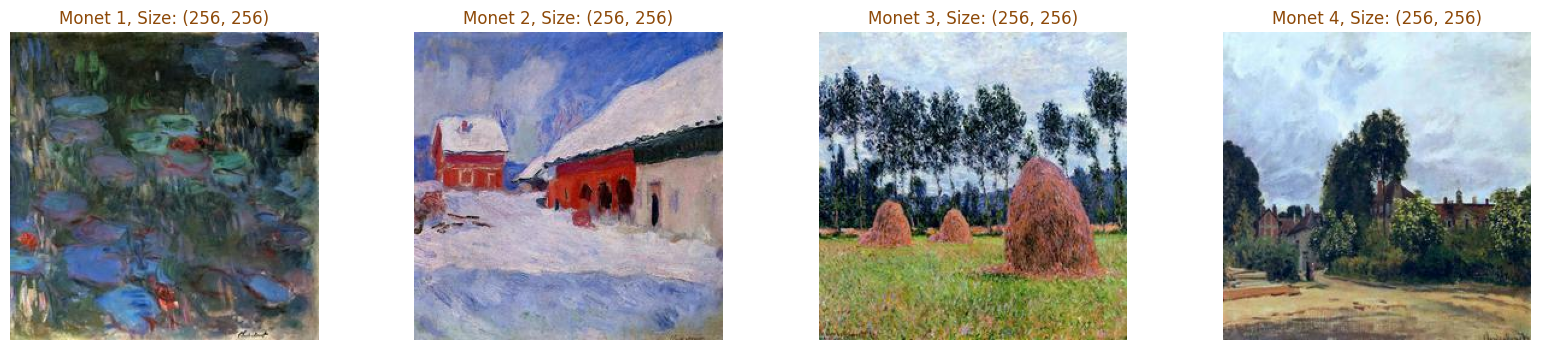

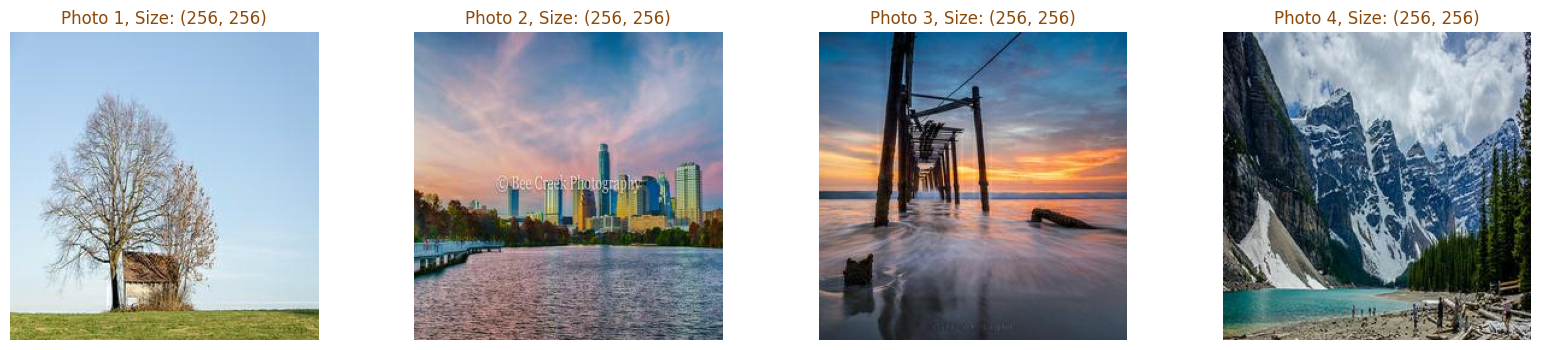

In [5]:
def display_sample_images(directory_path, sample_count=4, label=""):
    """Displays a set of sample images from the specified directory, along with their sizes."""

    # Get all filenames from the directory
    file_names = os.listdir(directory_path)
    # Randomly select a subset of filenames
    selected_file_names = np.random.choice(file_names, sample_count, replace=False)

    # Create subplots for displaying images
    fig, axes = plt.subplots(1, sample_count, figsize=(20, 4))

    for idx, file_name in enumerate(selected_file_names):
        # Construct full path to the image file
        image_path = os.path.join(directory_path, file_name)

        # Read and convert the image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

        # Display the image
        axes[idx].imshow(image)
        axes[idx].axis('off')
        # Display image size in title
        image_size = image.shape[:2]  # Get image size (height, width)
        title_text = f"{label} {idx + 1}, Size: {image_size}"
        axes[idx].set_title(title_text, color='#8d4908')

    plt.show()

# Directory paths for Monet and Photo images
monet_directory = '/content/drive/MyDrive/GAN_Project/monet_jpg/'
photo_directory = '/content/drive/MyDrive/GAN_Project/photo_jpg/'

# Display sample images from each directory
display_sample_images(directory_path=monet_directory, label="Monet")
display_sample_images(directory_path=photo_directory, label="Photo")

The function called display_sample_images_channels that displays sample images . The function takes parameters such as the file path where the images are stored, the number of samples to display, and an optional title. It randomly selects sample images from the given directory, reads and decodes them using OpenCV, and converts them to RGB format. It then creates a matplotlib figure with subplots for each image.

In [ ]:
# Source code: https://www.kaggle.com/code/dimitreoliveira/introduction-to-cyclegan-monet-paintings

#TPU configuration
try:
    # detect the TPU
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    # print TPU master if sucessful
    print(f'Running on TPU {tpu.master()}')
except ValueError:
    tpu = None

if tpu:
    # TPU initialization
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    # TPU instantiation
    strategy = tf.distribute.TPUStrategy(tpu)

else:
    # Retrieve the default distribution strategy in TensorFlow when TPUs are not available
    strategy = tf.distribute.get_strategy()

# determine the number of replicas/workers
REPLICAS = strategy.num_replicas_in_sync
print(f'REPLICAS: {REPLICAS}')
# set up AUTOTUNE to optimize data pipeline performance dynamically
AUTO= tf.data.experimental.AUTOTUNE

REPLICAS: 1


### Numbers and sample file names of TFRecord files

In [ ]:

MONET_FILENAMES = tf.io.gfile.glob('/content/drive/MyDrive/GAN_Project/monet_tfrec/*.tfrec')
PHOTO_FILENAMES = tf.io.gfile.glob('/content/drive/MyDrive/GAN_Project/photo_tfrec/*.tfrec')
def count_data_items(filenames):
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    # print out some sample file names
    for filename in filenames[:20]:
        print("Sample filenames:", filename)

    return np.sum(n)


n_monet_samples = count_data_items(MONET_FILENAMES)
n_photo_samples = count_data_items(PHOTO_FILENAMES)

print(f'Monet TFRecord files: {len(MONET_FILENAMES)}')
print(f'Monet image files: {n_monet_samples}')
print(f'Photo TFRecord files: {len(PHOTO_FILENAMES)}')
print(f'Photo image files: {n_photo_samples}')

Sample filenames: /content/drive/MyDrive/GAN_Project/monet_tfrec/monet00-60.tfrec
Sample filenames: /content/drive/MyDrive/GAN_Project/monet_tfrec/monet04-60.tfrec
Sample filenames: /content/drive/MyDrive/GAN_Project/monet_tfrec/monet08-60.tfrec
Sample filenames: /content/drive/MyDrive/GAN_Project/monet_tfrec/monet12-60.tfrec
Sample filenames: /content/drive/MyDrive/GAN_Project/monet_tfrec/monet16-60.tfrec
Sample filenames: /content/drive/MyDrive/GAN_Project/photo_tfrec/photo00-352.tfrec
Sample filenames: /content/drive/MyDrive/GAN_Project/photo_tfrec/photo01-352.tfrec
Sample filenames: /content/drive/MyDrive/GAN_Project/photo_tfrec/photo02-352.tfrec
Sample filenames: /content/drive/MyDrive/GAN_Project/photo_tfrec/photo03-352.tfrec
Sample filenames: /content/drive/MyDrive/GAN_Project/photo_tfrec/photo04-352.tfrec
Sample filenames: /content/drive/MyDrive/GAN_Project/photo_tfrec/photo05-352.tfrec
Sample filenames: /content/drive/MyDrive/GAN_Project/photo_tfrec/photo06-352.tfrec
Sample fi

## Data Processing and Augmentation

### Decode and normalization function

In [ ]:
# Decode and normalization function
def decode_and_rescale(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = (tf.cast(image, tf.float32) / 127.5) - 1
    # Ensure all images are consistent in shape (256*256*3), although mostly likely they are
    image = tf.reshape(image, [256, 256, 3])
    return image

# Read TFRecord function - parse and then decode
def read_tfrecord(example):

    # Define the expected features and their types in the serialized example.
    tfrecord_format = {
        'image_name': tf.io.FixedLenFeature([], tf.string),
        'image':      tf.io.FixedLenFeature([], tf.string),
        'target':     tf.io.FixedLenFeature([], tf.string)
    }
    # Parse the serialized example using the provided format specification.
    # Decode the serialized features into their corresponding tensors according to the specified format.
    example = tf.io.parse_single_example(example, tfrecord_format)
    image = decode_and_rescale(example['image'])
    return image

The code defines two functions for processing images stored in TFRecord format. The decode_and_rescale function decodes a JPEG image from a serialized tensor, converts its pixel values to floating-point format, and normalizes them to a range of [-1, 1]. It also reshapes the image to ensure a consistent size of 256x256 pixels with three color channels. The read_tfrecord function parses a single serialized example from a TFRecord file based on a specified format, extracting the image data and applying the decoding and normalization process defined by decode_and_rescale. This function returns the processed image data for further usage in machine learning pipelines or image processing tasks.

## Image Augmentations

In [ ]:
def image_rotation(image):
    try:
        # Define rotation angles
        rotation_angles = tf.constant([0, 1, 2, 3], dtype=tf.int32)  # 0, 90, 180, 270 degrees

        # Shuffle rotation angles and choose one randomly
        shuffled_angles = tf.random.shuffle(rotation_angles)
        rotation_angle = shuffled_angles[0]

        # Rotate based on the randomly chosen rotation angle
        image = tf.image.rot90(image, k=rotation_angle)
    except Exception as e:
        print("Error in image rotation:", e)
    return image

def image_flip(image):
    try:
        return tf.image.random_flip_left_right(tf.image.random_flip_up_down(image))
    except Exception as e:
        print("Error in image flip:", e)
        return image
def image_transpose(image):
    try:
        return tf.image.transpose(image)
    except Exception as e:
        print("Error in image transpose:", e)
        return image

def image_crop(image, height=256, width=256):
    try:
        return tf.image.random_crop(image, size=[height, width, 3])
    except Exception as e:
        print("Error in image crop:", e)
        return image

The code defines four image manipulation functions for data augmentation in TensorFlow. The image_rotation function randomly rotates images by 0, 90, 180, or 270 degrees. image_flip flips images randomly both horizontally and vertically. image_transpose transposes images (flips them along the diagonal). image_crop randomly crops images to a specified height and width. Each function handles exceptions gracefully and prints error messages if encountered, ensuring smooth execution even in case of issues.


### Data Loading

In [ ]:
def load_dataset(filenames, labeled=True, ordered=False, repeat=False, shuffle=False, rotation=False, flip=False, transpose=False, crop=False, height=256, width=256):
    dataset = tf.data.TFRecordDataset(filenames)
    dataset = dataset.map(read_tfrecord, num_parallel_calls=AUTO)

    if repeat:
        dataset = dataset.repeat()

    if shuffle:
        dataset = dataset.shuffle(512)
    if rotation:
        dataset = dataset.map(image_rotation, num_parallel_calls=AUTO)
    if flip:
        dataset = dataset.map(image_flip, num_parallel_calls=AUTO)
    if transpose:
        dataset = dataset.map(image_transpose, num_parallel_calls=AUTO)
    if crop:
        # Use functools.partial to create a function with preset height and width arguments
        crop_function = functools.partial(image_crop, height=height, width=width)
        dataset = dataset.map(crop_function, num_parallel_calls=AUTO)

    # Add prefetching
    dataset = dataset.prefetch(AUTO)
    return dataset
BATCH_SIZE=1
# Monet
monet_data = load_dataset(MONET_FILENAMES, labeled=True).batch(batch_size=1)
# Photo
photo_data = load_dataset(PHOTO_FILENAMES, labeled=True).batch(batch_size=1)

In [ ]:
# Count the number of elements in the dataset
size = 0
for _ in photo_data:
    size += 1

print(f"Size of the dataset: {size}")

Size of the dataset: 7038


In [ ]:
# Count the number of elements in the dataset
size = 0
for _ in monet_data:
    size += 1

print(f"Size of the dataset: {size}")

Size of the dataset: 300


The code defines a flexible data loading function named load_dataset to handle various preprocessing steps for images stored in TFRecord format. This function allows for options such as repetition, shuffling, rotation, flipping, transposing, and cropping of images. It applies these transformations based on the specified parameters. Additionally, it supports batching and prefetching to optimize data loading performance. Two datasets are loaded, one for Monet images and another for photo images, with different preprocessing configurations applied based on the task requirements.

## Model Construction and Architecture

### Build Generators

### Downsample

In [ ]:
def downsample(filters, size, stride=2, padding='same', apply_instancenorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)  # Initialize weights on filters
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)  # Initialize instance Normalization

    result = keras.Sequential()
    result.add(layers.Conv2D(filters, size,
                             strides=stride,
                             padding=padding,
                             kernel_initializer=initializer,
                             use_bias=False))

    if apply_instancenorm:
        result.add(tf.keras.layers.GroupNormalization(groups=-1, gamma_initializer=gamma_init))  # GroupNormalization for instance normalization
    result.add(layers.LeakyReLU())

    return result

#### Upsample

In [ ]:
# Upsample function block
def upsample(filters, size, stride=2,padding='same',apply_dropout=False, dropout_rate = 0.5):
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    result = keras.Sequential()
    result.add(layers.Conv2DTranspose(filters, size,
                                      strides=stride,
                                      padding=padding,
                                      kernel_initializer=initializer,
                                      use_bias=False))

    result.add(tf.keras.layers.GroupNormalization(groups=-1,gamma_initializer=gamma_init )) # GroupNormailization work the same as deprecated InstanceNormalization()
    if apply_dropout:
        result.add(layers.Dropout(dropout_rate))

    result.add(layers.ReLU())

    return result

###  Generator

In [ ]:
# Build Generator
def Generator(dropout_rate=0.5, filter_size_E1=4, filter_size=4, filter_channel_1st=64, transfer_layers=5, stride_num=2, padding_style='same'):
    inputs = layers.Input(shape=[256, 256, 3])

    # Encoder
    encoder = [
        downsample(filters=filter_channel_1st, size=filter_size_E1, stride=stride_num, padding=padding_style, apply_instancenorm=False),  # (bs, 128, 128, 64)
        downsample(filters=filter_channel_1st * 2, size=filter_size, stride=stride_num, padding=padding_style),  # (bs, 64, 64, 128)
        downsample(filters=filter_channel_1st * 4, size=filter_size, stride=stride_num, padding=padding_style),  # (bs, 32, 32, 256)
    ]
    encoder += [
        downsample(filters=filter_channel_1st * 4, size=filter_size, stride=stride_num, padding=padding_style)  # (bs, 16, 16, 512) -> (bs, 8, 8, 512)->(bs, 4, 4, 512)->(bs, 2, 2, 512)
        for _ in range(transfer_layers)
    ]
# Decoder
    decoder = []
    decoder += [
        upsample(filters=filter_channel_1st * 4, size=filter_size, stride=stride_num, padding=padding_style, apply_dropout=True, dropout_rate=dropout_rate)  # (bs, 2, 2, 512)->(bs, 4, 4, 512)->(bs, 8, 8, 512)
        for _ in range(transfer_layers - 1)
    ]

    decoder.extend([
        upsample(filters=filter_channel_1st * 4, size=filter_size, stride=stride_num, padding=padding_style),  # (bs, 16, 16, 512)
        upsample(filters=filter_channel_1st * 2 * 2, size=filter_size, stride=stride_num, padding=padding_style),  # (bs, 32, 32, 256)
        upsample(filters=filter_channel_1st * 2, size=filter_size, stride=stride_num, padding=padding_style),  # (bs, 64, 64, 128)
        upsample(filters=filter_channel_1st, size=filter_size, stride=stride_num, padding=padding_style)  # (bs, 128, 128, 64)
    ])

    initializer = tf.random_normal_initializer(0., 0.02)  # Initializer for last output layer

    last = layers.Conv2DTranspose(3, filter_size_E1,  # 3 is output channel, which is our RGB color channel
                                  strides=stride_num,
                                  padding=padding_style,
                                  kernel_initializer=initializer,
                                  activation='tanh')  # (bs, 256, 256, 3)
    x = inputs
    # Downsampling through the model
    # x will be sequentially passed through the layers of the encoder.
    # Intermediate feature maps will be stored in the skips list for later use in skip connections.
    skips = []
    for down in encoder:
        x = down(x)
        skips.append(x)

    # Since decoder has symmetric shape of encoder, need to reverse the order of feature maps from encoder.
    skips = reversed(skips[:-1])
    # Upsampling and establishing the skip connections
    for up, skip in zip(decoder, skips):
        x = up(x)
        x = layers.Concatenate()([x, skip])  # For each upsampling block, skip connection from "mirroring" downsampling feature map will be added

    x = last(x)
    model = keras.Model(inputs=inputs, outputs=x)

    # Print model summary
    return model

### Discriminator

In [ ]:
def Discriminator(filter_size=4, filter_channel_1st=64, down_layer_num=3, strides=1):
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    inp = layers.Input(shape=[256, 256, 3], name='input_image')
    x = inp

    # Add noise layer to prevent overfitting
    noise = layers.GaussianNoise(0.001)(inp)  # Add Gaussian noise with standard deviation
    x = layers.Concatenate()([x, noise])

    down_layers = []

    for i in range(down_layer_num):
        filters = filter_channel_1st * (2 ** i)
        if i == 0:
            down_layers.append(downsample(filters, filter_size, apply_instancenorm=False))  # No normalization on first layer of discriminator
        else:
            down_layers.append(downsample(filters, filter_size))  # Apply normalization for subsequent layers

    # Applying downsampling layers
    for down in down_layers:
        x = down(x)

    zero_pad = layers.ZeroPadding2D()(x)  # Zero padding before the final convolutional layer
    conv = layers.Conv2D(filter_channel_1st * (2 ** down_layer_num), filter_size, strides=strides, kernel_initializer=initializer, use_bias=False)(zero_pad)  # (x,x,x,512) if 3 down layers
    norm = tf.keras.layers.GroupNormalization(groups=-1, gamma_initializer=gamma_init)(conv)
    leaky_relu = layers.LeakyReLU()(norm)

    zero_pad2 = layers.ZeroPadding2D()(leaky_relu)  # Zero padding before the output layer
    last = layers.Conv2D(1, filter_size, strides=1, kernel_initializer=initializer)(zero_pad2)

    return tf.keras.Model(inputs=inp, outputs=last)

The code defines a discriminator network for a Generative Adversarial Network (GAN) architecture used for image translation tasks. The discriminator takes as input images of size 256x256x3 and processes them through a series of downsampling layers followed by convolutional operations. Gaussian noise is added to the input image to prevent overfitting. The downsampling layers progressively reduce the spatial dimensions of the input image while increasing the number of filters. Group normalization is applied to the feature maps before passing them through LeakyReLU activation functions. The discriminator outputs a single-channel image that represents the likelihood of the input image being real or fake.

## Build CycleGAN Model

In [ ]:
import tensorflow as tf
from tensorflow import keras

class CycleGan(keras.Model):
    # CycleGan class inheriting from keras.Model class
    def __init__(
        self,
        monet_generator,
        photo_generator,
        monet_discriminator,
        photo_discriminator,
        lambda_cycle=10,
        buffer_size=50,
    ):
        super(CycleGan, self).__init__()  # Initializes the superclass of CycleGan, which is keras.Model
        self.m_gen = monet_generator
        self.p_gen = photo_generator
        self.m_disc = monet_discriminator
        self.p_disc = photo_discriminator
        self.lambda_cycle = lambda_cycle
        self.buffer_size = buffer_size

    def compile(
        self,
        m_gen_optimizer,
        p_gen_optimizer,
        m_disc_optimizer,
        p_disc_optimizer,
        gen_loss_fn,
        disc_loss_fn,
        cycle_loss_fn,
        identity_loss_fn,
    ):
        super(CycleGan, self).compile()  # Calls the compile method of the parent class
        self.m_gen_optimizer = m_gen_optimizer
        self.p_gen_optimizer = p_gen_optimizer
        self.m_disc_optimizer = m_disc_optimizer
        self.p_disc_optimizer = p_disc_optimizer
        self.gen_loss_fn = gen_loss_fn
        self.disc_loss_fn = disc_loss_fn
        self.cycle_loss_fn = cycle_loss_fn
        self.identity_loss_fn = identity_loss_fn

    def train_step(self, batch_data):
        real_monet, real_photo = batch_data

        # Use TensorFlow context manager tf.GradientTape for automatic differentiation
        with tf.GradientTape(persistent=True) as tape:
            # Generate fake and cycled images: photo to monet back to photo
            fake_monet = self.m_gen(real_photo, training=True)
            cycled_photo = self.p_gen(fake_monet, training=True)

            # Generate fake cycled images: monet to photo back to monet
            fake_photo = self.p_gen(real_monet, training=True)
            cycled_monet = self.m_gen(fake_photo, training=True)

            # Generate same domain images
            same_monet = self.m_gen(real_monet, training=True)
            same_photo = self.p_gen(real_photo, training=True)

            # Send real images to discriminators
            disc_real_monet = self.m_disc(real_monet, training=True)
            disc_real_photo = self.p_disc(real_photo, training=True)

            # Send fake images to discriminators
            disc_fake_monet = self.m_disc(fake_monet, training=True)
            disc_fake_photo = self.p_disc(fake_photo, training=True)

            # Generator adversarial loss
            monet_gen_loss = self.gen_loss_fn(disc_fake_monet)
            photo_gen_loss = self.gen_loss_fn(disc_fake_photo)

            # Generator cycle consistency loss
            total_cycle_loss = (
                self.cycle_loss_fn(real_monet, cycled_monet, self.lambda_cycle)
                + self.cycle_loss_fn(real_photo, cycled_photo, self.lambda_cycle)
            )

            # Total generator loss including identity loss to prevent overfitting
            total_monet_gen_loss = (
                monet_gen_loss
                + total_cycle_loss
                + self.identity_loss_fn(real_monet, same_monet, self.lambda_cycle)
            )
            total_photo_gen_loss = (
                photo_gen_loss
                + total_cycle_loss
                + self.identity_loss_fn(real_photo, same_photo, self.lambda_cycle)
            )

            # Discriminator loss
            monet_disc_loss = self.disc_loss_fn(disc_real_monet, disc_fake_monet)
            photo_disc_loss = self.disc_loss_fn(disc_real_photo, disc_fake_photo)

        # Update gradients and apply them
        monet_generator_gradients = tape.gradient(total_monet_gen_loss, self.m_gen.trainable_variables)
        photo_generator_gradients = tape.gradient(total_photo_gen_loss, self.p_gen.trainable_variables)
        monet_discriminator_gradients = tape.gradient(monet_disc_loss, self.m_disc.trainable_variables)
        photo_discriminator_gradients = tape.gradient(photo_disc_loss, self.p_disc.trainable_variables)

        self.m_gen_optimizer.apply_gradients(zip(monet_generator_gradients, self.m_gen.trainable_variables))
        self.p_gen_optimizer.apply_gradients(zip(photo_generator_gradients, self.p_gen.trainable_variables))
        self.m_disc_optimizer.apply_gradients(zip(monet_discriminator_gradients, self.m_disc.trainable_variables))
        self.p_disc_optimizer.apply_gradients(zip(photo_discriminator_gradients, self.p_disc.trainable_variables))

        return {
            "monet_gen_loss": total_monet_gen_loss,
            "photo_gen_loss": total_photo_gen_loss,
            "monet_disc_loss": monet_disc_loss,
            "photo_disc_loss": photo_disc_loss,
            "total_cycle_loss": total_cycle_loss,
        }

### Define Loss Functions

#### Discriminator Adversarial Losses

In [ ]:
with strategy.scope():
    def discriminator_loss(real, generated):
        real_loss = tf.keras.losses.BinaryCrossentropy(
            from_logits=True,
            reduction=tf.keras.losses.Reduction.NONE
        )(tf.ones_like(real), real)

        generated_loss = tf.keras.losses.BinaryCrossentropy(
            from_logits=True,
            reduction=tf.keras.losses.Reduction.NONE
        )(tf.zeros_like(generated), generated)

        total_disc_loss = real_loss + generated_loss

        return total_disc_loss * 0.5

##### Generators Adversary Losses

In [ ]:
with strategy.scope():
    def generator_loss(generated):
        return tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.ones_like(generated), generated)

##### Generators Cycle Consistency Losses

In [ ]:
with strategy.scope():
    def calc_cycle_loss(real_image, cycled_image, LAMBDA):
        loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))

        return LAMBDA * loss1

##### Generators Identity Consistency Losses

In [ ]:
with strategy.scope():
    def identity_loss(real_image, same_image, LAMBDA):
        loss = tf.reduce_mean(tf.abs(real_image - same_image))
        return LAMBDA * 0.5 * loss

## Tunning parameters:

### Model 1:

In [ ]:
# Model 1 - baseline
EPOCHS = 5
BATCH_SIZE=1
NUM_MONET = 300 #we got this from part 1 of this notebook. No need to change
LEARNING_RATE = 2e-4
BETA_1 = 0.5
LAMBDA = 10
BUFFER_SIZE = 50
DROPOUT_RATE_GEN = 0
TRANSFER_LAYERS_GEN = 3
STRIDE_NUM_GEN = 2
STRIDE_NUM_DIS = 1
PADDING_GEN ='same'
FITLER_SIZE_GEN =2
FITLER_SIZE_DIS = 2
FILTER_SIZE_E1_GEN = 2
FILTER_CHANEL_1ST_GEN =32
FILTER_CHANEL_1ST_DIS = 32
DOWN_LAYER_NUM_DIS= 2

In [ ]:
with strategy.scope():
        monet_generator = Generator(dropout_rate=DROPOUT_RATE_GEN, filter_size_E1=FILTER_SIZE_E1_GEN , filter_size=FITLER_SIZE_GEN, filter_channel_1st =32, transfer_layers=TRANSFER_LAYERS_GEN, stride_num=STRIDE_NUM_GEN, padding_style=PADDING_GEN)
        photo_generator= Generator(dropout_rate=DROPOUT_RATE_GEN,filter_size_E1=FILTER_SIZE_E1_GEN, filter_size=FITLER_SIZE_GEN, filter_channel_1st =FILTER_CHANEL_1ST_GEN,transfer_layers=TRANSFER_LAYERS_GEN, stride_num=STRIDE_NUM_GEN, padding_style=PADDING_GEN)
        monet_discriminator = Discriminator(filter_size=FITLER_SIZE_DIS , filter_channel_1st=FILTER_CHANEL_1ST_DIS, down_layer_num=DOWN_LAYER_NUM_DIS, strides=STRIDE_NUM_DIS)
        photo_discriminator= Discriminator(filter_size=FITLER_SIZE_DIS , filter_channel_1st=FILTER_CHANEL_1ST_DIS, down_layer_num=DOWN_LAYER_NUM_DIS,strides=STRIDE_NUM_DIS)

        monet_generator_optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum=BETA_1)
        photo_generator_optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum=BETA_1)
        monet_discriminator_optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum=BETA_1)
        photo_discriminator_optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum=BETA_1)

In [ ]:
with strategy.scope():
        cycle_gan_model = CycleGan(
                monet_generator, photo_generator, monet_discriminator, photo_discriminator, lambda_cycle=LAMBDA , buffer_size= BUFFER_SIZE
            )

        cycle_gan_model.compile(
                m_gen_optimizer = monet_generator_optimizer,
                p_gen_optimizer = photo_generator_optimizer,
                m_disc_optimizer = monet_discriminator_optimizer,
                p_disc_optimizer = photo_discriminator_optimizer,
                gen_loss_fn = generator_loss,
                disc_loss_fn = discriminator_loss,
                cycle_loss_fn = calc_cycle_loss,
                identity_loss_fn = identity_loss
            )

In [ ]:
# Monet
monet_data = load_dataset(MONET_FILENAMES, labeled=True).batch(batch_size=1)
# Photo
photo_data = load_dataset(PHOTO_FILENAMES, labeled=True).batch(batch_size=1)

In [ ]:
# Train baseline model 1
hist_model1= cycle_gan_model.fit(
    tf.data.Dataset.zip((monet_data,photo_data)),
    epochs= EPOCHS,
    batch_size=BATCH_SIZE,
#     steps_per_epoch=NUM_MONET //BATCH_SIZE-BATCH_SIZE
)

Epoch 1/5
300/300 [==============================] - 76s 73ms/step - monet_gen_loss: 22.2573 - photo_gen_loss: 20.9323 - monet_disc_loss: 0.6828 - photo_disc_loss: 0.6877 - total_cycle_loss: 16.5522
Epoch 2/5
300/300 [==============================] - 20s 68ms/step - monet_gen_loss: 19.5004 - photo_gen_loss: 17.7513 - monet_disc_loss: 0.7187 - photo_disc_loss: 0.6853 - total_cycle_loss: 13.8483
Epoch 3/5
300/300 [==============================] - 21s 69ms/step - monet_gen_loss: 16.7775 - photo_gen_loss: 15.5882 - monet_disc_loss: 0.7133 - photo_disc_loss: 0.6851 - total_cycle_loss: 11.9791
Epoch 4/5
300/300 [==============================] - 20s 67ms/step - monet_gen_loss: 16.1192 - photo_gen_loss: 15.5396 - monet_disc_loss: 0.6896 - photo_disc_loss: 0.6805 - total_cycle_loss: 11.8460
Epoch 5/5
300/300 [==============================] - 20s 67ms/step - monet_gen_loss: 16.1293 - photo_gen_loss: 15.3683 - monet_disc_loss: 0.7073 - photo_disc_loss: 0.6810 - total_cycle_loss: 11.6293


In [ ]:
# Look at losses of shapes
print("Monet Generator Loss shape:", np.array(hist_model1.history['monet_gen_loss']).shape)
print("Monet Discriminator Loss shape:", np.array(hist_model1.history['monet_disc_loss']).shape)
print("Monet total cycle Loss:", hist_model1.history['total_cycle_loss'])

Monet Generator Loss shape: (5, 1, 66, 66)
Monet Discriminator Loss shape: (5, 1, 66, 66)
Monet total cycle Loss: [16.511934280395508, 16.200279235839844, 15.921796798706055, 14.871576309204102, 14.941092491149902]


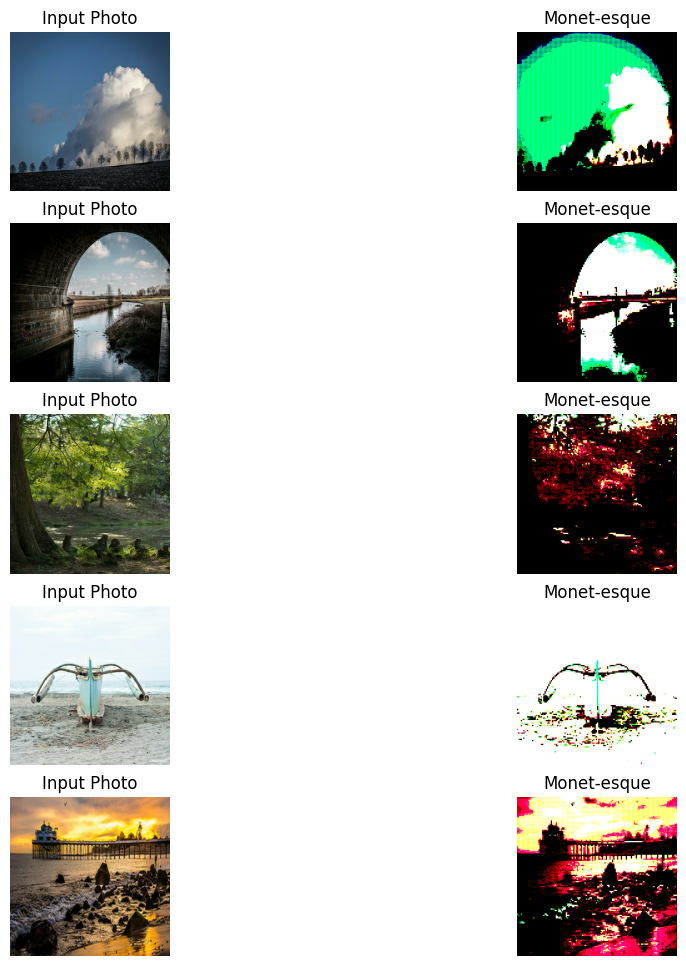

In [ ]:
_, ax = plt.subplots(5, 2, figsize=(12, 12))
for i, img in enumerate(photo_data.take(5)):
    prediction = monet_generator(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input Photo")
    ax[i, 1].set_title("Monet-esque")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")
plt.show()

### Model 2

In [ ]:

EPOCHS = 5
BATCH_SIZE=2
LEARNING_RATE = 1e-4
LEARNING_RATE_MIN = 1e-5
NUM_MONET = 300*2 #we got this from part 1 of this notebook. Doulbe it since we will repeat selection.
NUM_PHOTO = 7038
DECAY_STEPS = int( NUM_PHOTO / BATCH_SIZE)*5
DECAY_RATE=0.6

BUFFER_SIZE=50 # controls how oftern to update discriminator. Still working on the coding :)
BETA_1 = 0.5
LAMBDA = 3

DROPOUT_RATE_GEN = 0.5
TRANSFER_LAYERS_GEN = 5
STRIDE_NUM_GEN, STRIDE_NUM_DIS = 2,1
PADDING_GEN ='same'
FITLER_SIZE_GEN, FITLER_SIZE_DIS = 4, 4
FILTER_SIZE_E1_GEN =4
FILTER_CHANEL_1ST_GEN,FILTER_CHANEL_1ST_DIS = 64, 64
DOWN_LAYER_NUM_DIS=3

In [ ]:
# Define the learning rate scheduler
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, initial_learning_rate, learning_rate_min, decay_steps, decay_rate):
        super(CustomSchedule, self).__init__()
        self.initial_learning_rate = initial_learning_rate
        self.min_learning_rate = learning_rate_min
        self.decay_steps = decay_steps
        self.decay_rate = decay_rate


    def __call__(self, step):
            learning_rate = tf.math.maximum(self.initial_learning_rate * self.decay_rate ** (step  / self.decay_steps), self.min_learning_rate)
            return learning_rate

# learning rate scheduler instance
learning_rate_scheduler = CustomSchedule(initial_learning_rate=LEARNING_RATE, learning_rate_min=LEARNING_RATE_MIN ,decay_steps=DECAY_STEPS, decay_rate=DECAY_RATE)

# plot
# Number of steps in training
num_steps = int(NUM_PHOTO /BATCH_SIZE * EPOCHS )


In [ ]:
# Monet
monet_data_augm = load_dataset(MONET_FILENAMES, labeled=True, ordered=False,repeat=True, shuffle=True,rotation=True, flip=True, transpose=True, crop=False, height=256,width=256).batch(batch_size=BATCH_SIZE)
# Photo
# photo dataset size of 7038 won't be enoughfor steps per epoch* number of epochs. repeat() on photo dataset too to let date generate indefinitely
photo_data_augm = load_dataset(PHOTO_FILENAMES,  labeled=True, ordered=False,repeat=False, shuffle=True,rotation=True, flip=True, transpose=True, crop=False, height=256,width=256).batch(batch_size=BATCH_SIZE)

In [ ]:
with strategy.scope():
        monet_generator = Generator(dropout_rate=DROPOUT_RATE_GEN,filter_size_E1=FILTER_SIZE_E1_GEN, filter_size=FITLER_SIZE_GEN, filter_channel_1st =FILTER_CHANEL_1ST_GEN,transfer_layers=TRANSFER_LAYERS_GEN, stride_num=STRIDE_NUM_GEN, padding_style=PADDING_GEN)
        photo_generator= Generator(dropout_rate=DROPOUT_RATE_GEN, filter_size_E1=FILTER_SIZE_E1_GEN,filter_size=FITLER_SIZE_GEN, filter_channel_1st =FILTER_CHANEL_1ST_GEN,transfer_layers=TRANSFER_LAYERS_GEN, stride_num=STRIDE_NUM_GEN, padding_style=PADDING_GEN)
        monet_discriminator = Discriminator(filter_size=FITLER_SIZE_DIS , filter_channel_1st=FILTER_CHANEL_1ST_DIS, down_layer_num=DOWN_LAYER_NUM_DIS, strides=STRIDE_NUM_DIS)
        photo_discriminator= Discriminator(filter_size=FITLER_SIZE_DIS , filter_channel_1st=FILTER_CHANEL_1ST_DIS, down_layer_num=DOWN_LAYER_NUM_DIS,strides=STRIDE_NUM_DIS)
        monet_generator_optimizer = tf.keras.optimizers.Adam(learning_rate= 1e-4,  beta_1 =BETA_1)
        photo_generator_optimizer = tf.keras.optimizers.Adam(learning_rate= 1e-4,beta_1 =BETA_1)
        monet_discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate= 1e-4,beta_1 =BETA_1)
        photo_discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4,beta_1 =BETA_1)

In [ ]:

with strategy.scope():
        cycle_gan_model = CycleGan(
                monet_generator, photo_generator, monet_discriminator, photo_discriminator, lambda_cycle=LAMBDA , buffer_size= BUFFER_SIZE
            )

        cycle_gan_model.compile(
                m_gen_optimizer = monet_generator_optimizer,
                p_gen_optimizer = photo_generator_optimizer,
                m_disc_optimizer = monet_discriminator_optimizer,
                p_disc_optimizer = photo_discriminator_optimizer,
                gen_loss_fn = generator_loss,
                disc_loss_fn = discriminator_loss,
                cycle_loss_fn = calc_cycle_loss,
                identity_loss_fn = identity_loss
            )

In [ ]:
# Train model 5
hist_model= cycle_gan_model.fit(
    tf.data.Dataset.zip((monet_data_augm ,photo_data_augm)),
    batch_size=BATCH_SIZE,
    epochs= EPOCHS)
#     steps_per_epoch=min(NUM_MONET, NUM_PHOTO) //BATCH_SIZE )

Epoch 1/5
3519/3519 [==============================] - 609s 152ms/step - monet_gen_loss: 1.8856 - photo_gen_loss: 2.1085 - monet_disc_loss: 0.6316 - photo_disc_loss: 0.5553 - total_cycle_loss: 0.8603
Epoch 2/5
3519/3519 [==============================] - 534s 152ms/step - monet_gen_loss: 1.5900 - photo_gen_loss: 1.7231 - monet_disc_loss: 0.6711 - photo_disc_loss: 0.6292 - total_cycle_loss: 0.6594
Epoch 3/5
3519/3519 [==============================] - 534s 152ms/step - monet_gen_loss: 1.4696 - photo_gen_loss: 1.5658 - monet_disc_loss: 0.6696 - photo_disc_loss: 0.6594 - total_cycle_loss: 0.5744
Epoch 4/5
3519/3519 [==============================] - 534s 152ms/step - monet_gen_loss: 1.3866 - photo_gen_loss: 1.5042 - monet_disc_loss: 0.6737 - photo_disc_loss: 0.6535 - total_cycle_loss: 0.5378
Epoch 5/5
3519/3519 [==============================] - 533s 151ms/step - monet_gen_loss: 1.3793 - photo_gen_loss: 1.5063 - monet_disc_loss: 0.6695 - photo_disc_loss: 0.6404 - total_cycle_loss: 0.5315


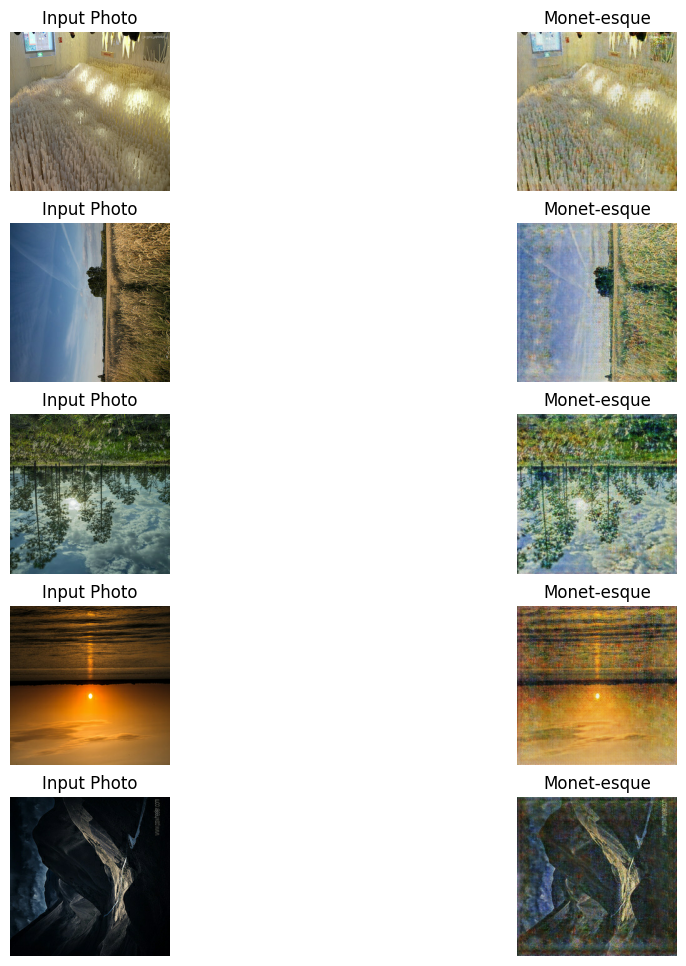

In [ ]:
_, ax = plt.subplots(5, 2, figsize=(12, 12))
for i, img in enumerate(photo_data_augm.take(5)):
    prediction = monet_generator(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input Photo")
    ax[i, 1].set_title("Monet-esque")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")
plt.show()

### Model 3



In [ ]:

EPOCHS = 20
BATCH_SIZE=6
LEARNING_RATE = 1e-4
LEARNING_RATE_MIN = 1e-5
NUM_MONET = 300*2 #we got this from part 1 of this notebook. Doulbe it since we will repeat selection.
NUM_PHOTO = 7038
DECAY_STEPS = int( NUM_PHOTO / BATCH_SIZE)*5
DECAY_RATE=0.6

BUFFER_SIZE=50 # controls how oftern to update discriminator. Still working on the coding :)
BETA_1 = 0.5
LAMBDA = 3

DROPOUT_RATE_GEN = 0.5
TRANSFER_LAYERS_GEN = 5
STRIDE_NUM_GEN, STRIDE_NUM_DIS = 2,1
PADDING_GEN ='same'
FITLER_SIZE_GEN, FITLER_SIZE_DIS = 4, 4
FILTER_SIZE_E1_GEN =4
FILTER_CHANEL_1ST_GEN,FILTER_CHANEL_1ST_DIS = 64, 64
DOWN_LAYER_NUM_DIS=3

In [ ]:
# Define the learning rate scheduler
class learning_rate_scheduler(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, initial_learning_rate, learning_rate_min, decay_steps, decay_rate):
        super(CustomSchedule, self).__init__()
        self.initial_learning_rate = initial_learning_rate
        self.min_learning_rate = learning_rate_min
        self.decay_steps = decay_steps
        self.decay_rate = decay_rate


    def __call__(self, step):
            learning_rate = tf.math.maximum(self.initial_learning_rate * self.decay_rate ** (step  / self.decay_steps), self.min_learning_rate)
            return learning_rate

# learning rate scheduler instance
learning_rate_scheduler = learning_rate_scheduler(initial_learning_rate=LEARNING_RATE, learning_rate_min=LEARNING_RATE_MIN ,decay_steps=DECAY_STEPS, decay_rate=DECAY_RATE)

# plot
# Number of steps in training
num_steps = int(NUM_PHOTO /BATCH_SIZE * EPOCHS )


In [ ]:
with strategy.scope():
        monet_generator = Generator(dropout_rate=DROPOUT_RATE_GEN,filter_size_E1=FILTER_SIZE_E1_GEN, filter_size=FITLER_SIZE_GEN, filter_channel_1st =FILTER_CHANEL_1ST_GEN,transfer_layers=TRANSFER_LAYERS_GEN, stride_num=STRIDE_NUM_GEN, padding_style=PADDING_GEN)
        photo_generator= Generator(dropout_rate=DROPOUT_RATE_GEN, filter_size_E1=FILTER_SIZE_E1_GEN,filter_size=FITLER_SIZE_GEN, filter_channel_1st =FILTER_CHANEL_1ST_GEN,transfer_layers=TRANSFER_LAYERS_GEN, stride_num=STRIDE_NUM_GEN, padding_style=PADDING_GEN)
        monet_discriminator = Discriminator(filter_size=FITLER_SIZE_DIS , filter_channel_1st=FILTER_CHANEL_1ST_DIS, down_layer_num=DOWN_LAYER_NUM_DIS, strides=STRIDE_NUM_DIS)
        photo_discriminator= Discriminator(filter_size=FITLER_SIZE_DIS , filter_channel_1st=FILTER_CHANEL_1ST_DIS, down_layer_num=DOWN_LAYER_NUM_DIS,strides=STRIDE_NUM_DIS)
        monet_generator_optimizer = tf.keras.optimizers.Adam(learning_rate= learning_rate_scheduler,  beta_1 =BETA_1)
        photo_generator_optimizer = tf.keras.optimizers.Adam(learning_rate= learning_rate_scheduler,beta_1 =BETA_1)
        monet_discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate= learning_rate_scheduler,beta_1 =BETA_1)
        photo_discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_scheduler,beta_1 =BETA_1)

In [ ]:

with strategy.scope():
        cycle_gan_model = CycleGan(
                monet_generator, photo_generator, monet_discriminator, photo_discriminator, lambda_cycle=LAMBDA , buffer_size= BUFFER_SIZE
            )

        cycle_gan_model.compile(
                m_gen_optimizer = monet_generator_optimizer,
                p_gen_optimizer = photo_generator_optimizer,
                m_disc_optimizer = monet_discriminator_optimizer,
                p_disc_optimizer = photo_discriminator_optimizer,
                gen_loss_fn = generator_loss,
                disc_loss_fn = discriminator_loss,
                cycle_loss_fn = calc_cycle_loss,
                identity_loss_fn = identity_loss
            )

In [1]:
# Train model
hist_model= cycle_gan_model.fit(
    tf.data.Dataset.zip((monet_data_augm ,photo_data_augm)),
    batch_size=BATCH_SIZE,
    epochs= EPOCHS)
 #     steps_per_epoch=min(NUM_MONET, NUM_PHOTO) //BATCH_SIZE)

Visualizing the real and fake images after training

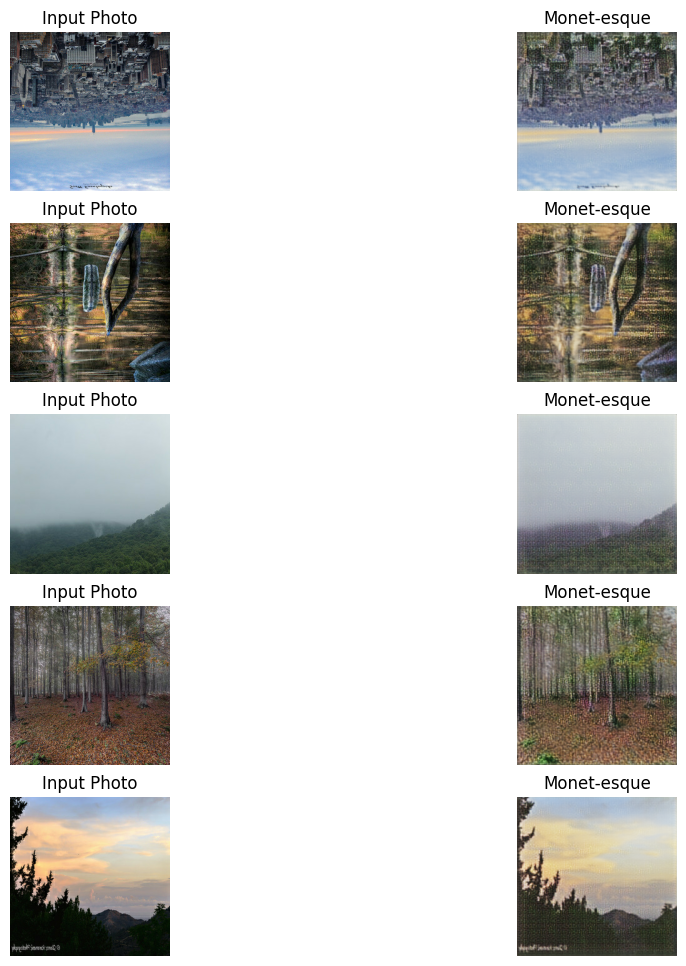

In [ ]:
_, ax = plt.subplots(5, 2, figsize=(12, 12))
for i, img in enumerate(photo_data_augm.take(5)):
    prediction = monet_generator(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input Photo")
    ax[i, 1].set_title("Monet-esque")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")
plt.show()

Generating Monet-Style Photos and Saving Them as a Zip File.

In [ ]:
# Create new directory
import os

# Ensure the directory exists
os.makedirs("/content/drive/MyDrive/GAN_Project/images", exist_ok=True)

# Generate Monet-style photos
i = 1
for photo in photo_data:
    with strategy.scope():
        photo_to_monet = monet_generator(photo, training=False)[0].numpy()
        photo_to_monet = (photo_to_monet * 127.5 + 127.5).astype(np.uint8)
        im = PIL.Image.fromarray(photo_to_monet)
        im.save(f"/content/drive/MyDrive/GAN_Project/images/{i}.jpg")
        i += 1

# Save the images as a zip file
import shutil

shutil.make_archive("/content/drive/MyDrive/GAN_Project/images", 'zip', "/content/drive/MyDrive/GAN_Project/images")

'/content/drive/MyDrive/GAN_Project/images.zip'

## Conclusion

In this project, I used a simpler architecture that followed the basic [CycleGAN](https://arxiv.org/abs/1703.10593) structure. This included [standard](https://www.kaggle.com/code/amyjang/monet-cyclegan-tutorial) generator and discriminator setups with downsampling for encoding and upsampling for decoding. The primary objective of tuning parameters is to identify the optimal learning parameters, epoch numbers, and batch sizes that could enhance CycleGAN training. Small batch sizes from 1-5 provided good results, especially a batch size of 2. I could not define the optimal number of epochs due to GPU limitations, especially when fitting the model with a learning rate scheduler to define the optimal value for the learning rate. However, 10^(-4) could be considered optimal. I plan to tune parameters using FID (Fréchet Inception Distance). I think a score of 49.81520 is good for a beginner.

## References



- [TFRecords Basics by Ryan Holbrook](https://www.kaggle.com/code/ryanholbrook/tfrecords-basics)
- [Monet Visualization and Augmentation by ihelon](https://www.kaggle.com/code/ihelon/monet-visualization-and-augmentation/notebook)
- [Introduction to CycleGAN - Monet Paintings by Dimitre Oliveira](https://www.kaggle.com/code/dimitreoliveira/introduction-to-cyclegan-monet-paintings)
- [Monet CycleGAN Tutorial by Amy Jang](https://www.kaggle.com/code/amyjang/monet-cyclegan-tutorial)
- [CycleGAN Example on Keras](https://keras.io/examples/generative/cyclegan/)
- [CycleGAN Tutorial on TensorFlow](https://www.tensorflow.org/tutorials/generative/cyclegan)
- [CycleGAN Paper on arXiv](https://arxiv.org/abs/1703.10593)
- [GAN Series by Jonathan Hui on Medium](https://medium.com/@jonathan-hui/gan-gan-series-2d279f906e7b)